In [1]:
import time
import keras_cv
from tensorflow import keras
import matplotlib.pyplot as plt

c:\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


First we will construct a model for text-to-image using keras_cv

In [3]:
model = keras_cv.models.StableDiffusion(img_width=512, img_height=512)

By using this model checkpoint, you acknowledge that its usage is subject to the terms of the CreativeML Open RAIL-M license at https://raw.githubusercontent.com/CompVis/stable-diffusion/main/LICENSE
A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 4789e63e07c0e54d6a34a29b45ce81ece27060c499a709d556c7755b42bb0dc4 so we will re-download the data.
198180272/198180272 [==============================] - 17s 0us/step


Next, we will give the model a text input and then predict the image from the text.

25/25 [==============================] - 824s 31s/step


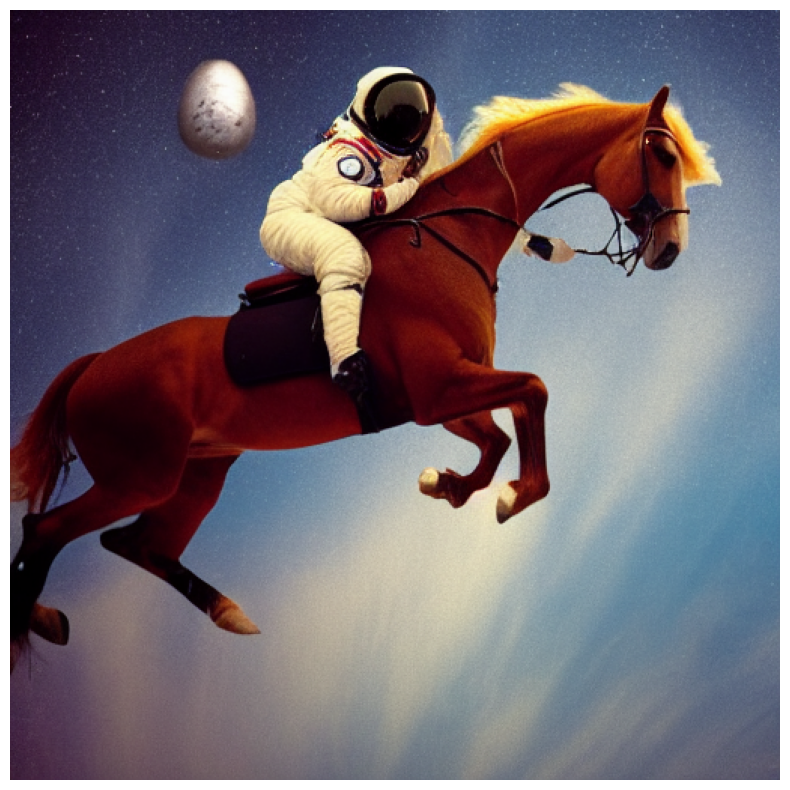

In [4]:
images = model.text_to_image("photograph of an astronaut riding a horse", batch_size = 1)


# plotting the image
def plot_image(images):
    plt.figure(figsize=(10, 10))
    for i in range(len(images)):
        ax = plt.subplot(1, len(images), i+1)
        plt.imshow(images[i])
        plt.axis("off")
        
plot_image(images)

Let's look at more examples.

25/25 [==============================] - 2413s 95s/step


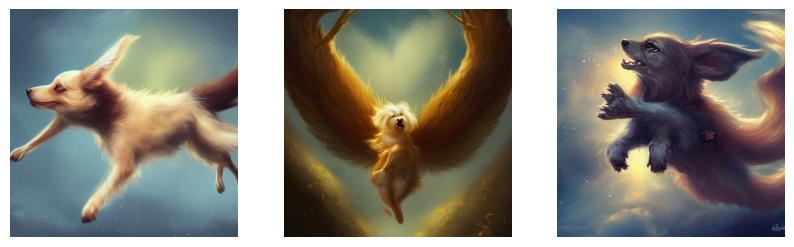

In [5]:
images = model.text_to_image("cute magical flying dog, fantasy art, "
    "golden color, high quality, highly detailed, elegant, sharp focus, "
    "concept art, character concepts, digital painting, mystery, adventure",batch_size = 3)

plot_image(images)

<u> **Advantages of using KerasCV Stable Diffusion** </u>
* XLA compilation
* Support for mixed precision computation

To see advantages of KerasCV practically, let's do the benchmarking of the model.

Standard Model: 890.70 seconds


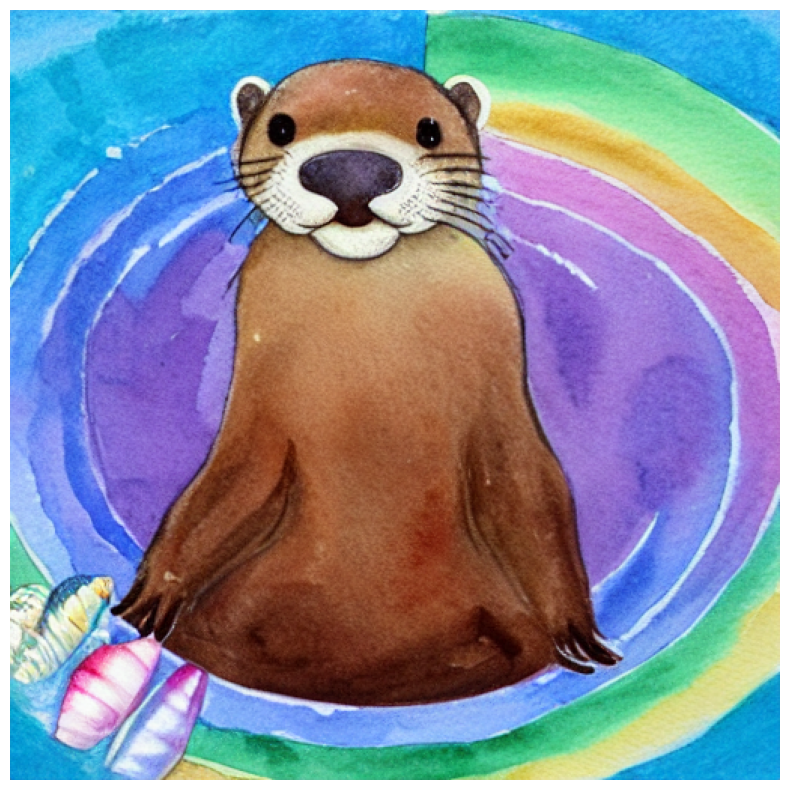

In [8]:
benchmark_result = []
start = time.time()
images = model.text_to_image("A cute otter in a rainbow whirlpool holding shells, watercolor", batch_size = 1)
end = time.time()

benchmark_result.append(["Standard: ", end - start])
plot_image(images)

print(f"Standard Model: {(end - start):.2f} seconds")

# clear session to preserve memory
keras.backend.clear_session()

<u>**Mixed Precision Computation**</u></br>
* Mixed precision consists of performing computation using float16 precision, while storing weights in the float32 format. This allows the model to run faster, while still maintaining the same accuracy. To enable mixed precision, we can use the keras_cv.mixed_precision.Policy class. This class can be used as a context manager, or as a decorator.

* Float16 operations are backed by significantly faster kernels than their float32 couterpart.

In [9]:
keras.mixed_precision.set_global_policy('mixed_float16')

model = keras_cv.models.StableDiffusion()

# warming up the model

model.text_to_image("warming up the model", batch_size = 1)

# Mixed precision benchmark
start = time.time()
images = model.text_to_image("A cute otter in a rainbow whirlpool holding shells, watercolor", batch_size = 1)
end = time.time()

benchmark_result.append(["Mixed Precision: ", end - start])

plot_image(images)

print("Mixed Precision Model: {(end - start):.2f} seconds")

# clear session to preserve memory
keras.backend.clear_session()

The dtype policy mixed_float16 may run slowly because this machine does not have a GPU. Only Nvidia GPUs with compute capability of at least 7.0 run quickly with mixed_float16.
If you will use compatible GPU(s) not attached to this host, e.g. by running a multi-worker model, you can ignore this warning. This message will only be logged once
By using this model checkpoint, you acknowledge that its usage is subject to the terms of the CreativeML Open RAIL-M license at https://raw.githubusercontent.com/CompVis/stable-diffusion/main/LICENSE


<u> **XLA Compilation** </u></br>
* XLA is a domain-specific compiler for linear algebra that can accelerate TensorFlow models. It can be enabled in model by setting the argument **jit_compile=True**. This will enable XLA compilation for all operations in the model.

In [ ]:
# set back to the default for benchmarking
keras.mixed_precision.set_global_policy('float32')

model = keras_cv.models.StableDiffusion(jit_compile=True)
# Before benchmarking, let's run inference once to make 
# sure Tensorflow graph has already been traced.

images = model.text_to_image("warming up the model", batch_size = 1)

In [ ]:
# XLA Benchmarking Code

start = time.time()

images = model.text_to_image("A cute otter in a rainbow whirlpool holding shells, watercolor", batch_size = 1)

end = time.time()
benchmark_result.append(["XLA: ", end - start])

plot_image(images)

print(f"XLA Model: {(end - start):.2f} seconds")

# clear session to preserve memory
keras.backend.clear_session()

<u> **Using Mixed Precision and XLA Compilation Together** </u></br>

In [ ]:
keras.mixed_precision.set_global_policy('mixed_float16')
model = keras_cv.models.StableDiffusion(jit_compile=True)

In [ ]:
# Let's warm up the model
model.text_to_image("warming up the model", batch_size = 1)

In [ ]:
# Final Benchmarking Code

start = time.time()
images = model.text_to_image("A cute otter in a rainbow whirlpool holding shells, watercolor", batch_size = 1)
end = time.time()
benchmark_result.append(["XLA + Mixed Precision: ", end - start])
plot_image(images)

print(f"XLA + Mixed Precision Model: {(end - start):.2f} seconds")


<u> **Final Conclusion** </u></br>

In [ ]:
print("Benchmarking Results")
print("{:<30} {:<30}".format("Model", "Runtime (seconds)"))

for result in benchmark_result:
    print("{:<30} {:<30}".format(result[0], result[1]))